In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weight-height.csv - weight-height.csv (1).csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df1 = df.copy()

In [6]:
m = StandardScaler()

In [7]:
df1.Height = m.fit_transform(df1[['Height']])

In [8]:
df1

,Gender,Height,Weight
0,Male,1.827233,241.893563
1,Male,0.512039,162.310473
2,Male,1.895545,212.740856
3,Male,1.277788,220.042470
4,Male,0.797634,206.349801
...,...,...,...
8550,Female,-1.642587,110.565497
8551,Female,-0.879344,129.921671
8552,Female,-0.318306,155.942671
8553,Female,0.161000,151.678405


In [9]:
df1.Height.mean() # 0

-1.1328038319056681e-15

In [10]:
df1.Height.std() #  1

1.0000584504778822

<AxesSubplot:xlabel='Height', ylabel='Count'>

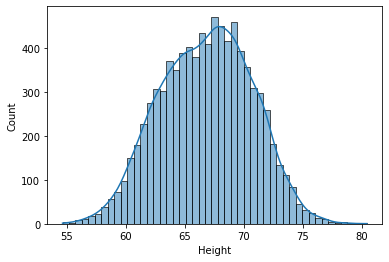

In [11]:
sns.histplot(df.Height, kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

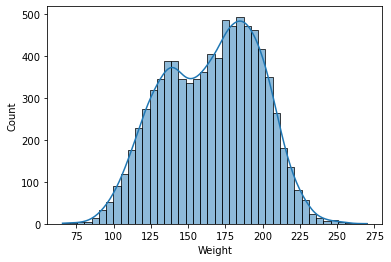

In [12]:
sns.histplot(df.Weight, kde=True)

In [13]:
df.Height.std() # standard deviation

3.8514544315772765

In [14]:
df.Height.var() # variance

14.833701238516243

In [15]:
3.8514544315772765*3.8514544315772765


14.833701238516243

In [16]:
mean_value = df['Height'].mean()

In [17]:
std = df['Height'].std()

In [18]:
std

3.8514544315772765

In [19]:
std_3 = mean_value + (3*std) #upper limit

In [20]:
std__3 = mean_value - (3*std) # lower limit

In [21]:
std_3

78.36428842382108

In [22]:
std__3

55.25556183435742

In [23]:
df[df.Height>std_3]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [24]:
df.shape

(8555, 3)

In [25]:
(8555*.4)/100

34.22

In [26]:
df[df.Height<std__3]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [27]:
df_remove = df[(df.Height>std__3) & (df.Height<std_3)]

In [28]:
df_remove

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [29]:
df.shape

(8555, 3)

<AxesSubplot:xlabel='Height', ylabel='Count'>

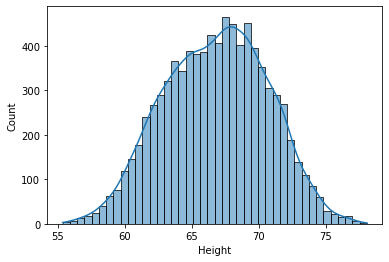

In [30]:
sns.histplot(df_remove.Height, kde=True)

In [31]:
std_3 = mean_value + (2.5*std)

In [32]:
std__3 = mean_value - (2.5*std)

<AxesSubplot:xlabel='Height', ylabel='Count'>

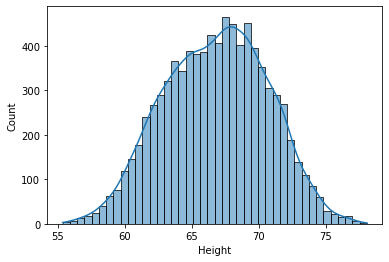

In [33]:
sns.histplot(df_remove.Height, kde=True)

# Z Score

In [34]:
df['zscore'] = (df.Height - df.Height.mean())/df.Height.std() #x-miu/sigma = Standarization

In [35]:
df['zscore']

0       1.827126
1       0.512009
2       1.895435
3       1.277713
4       0.797587
          ...   
8550   -1.642491
8551   -0.879292
8552   -0.318287
8553    0.160990
8554   -1.528808
Name: zscore, Length: 8555, dtype: float64

In [36]:
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


<AxesSubplot:xlabel='Height', ylabel='Count'>

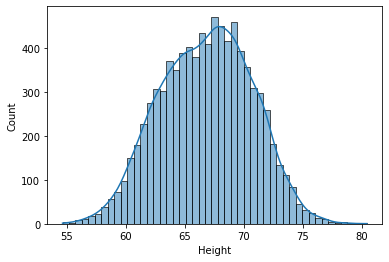

In [37]:
sns.histplot(df.Height, kde=True)

<AxesSubplot:xlabel='zscore', ylabel='Count'>

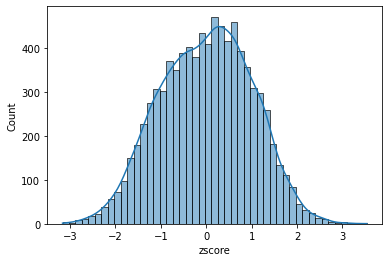

In [38]:
sns.histplot(df.zscore, kde=True)

In [39]:
df.zscore.mean() # =0

4.5280021047016066e-14

In [40]:
df.zscore.std() # = 1

0.9999999999999981

# Outlier detection using IQR

IQR = Q3-Q1
Lower_limit = Q1-1.5*IQR
Upper_limit = Q3+1.5*IQR

In [41]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.95768391, 69.60442710999999)

In [44]:
IQR = Q3 - Q1
IQR

5.646743199999989

In [47]:
Lower_limit = Q1-1.5*IQR
Upper_limit = Q3+1.5*IQR
Lower_limit, Upper_limit

(55.48756911000002, 78.07454190999997)

In [49]:
df_no_outlier = df[(df.Height<Lower_limit)| (df.Height>Upper_limit)]

In [50]:
df_no_outlier

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,2.930307
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
5345,Female,55.336492,88.366583,-2.978987
6328,Female,80.450000,178.020675,3.541539
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783
